In [15]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import backend as k
import os
(x_train,y_train),(x_test,y_test)=mnist.load_data()

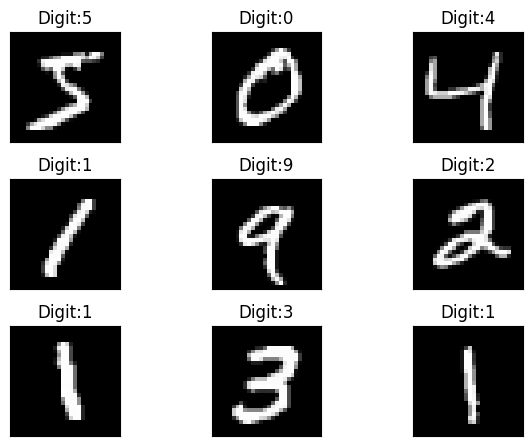

In [16]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap='gray',interpolation='none')
    plt.title("Digit:{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()    

In [17]:
img_rows,img_cols=28,28
if k.image_data_format()=='channels_first':
    x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape=(img_rows,img_cols,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')



60000 train samples
10000 test samples


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten 
num_category=10
y_train=keras.utils.to_categorical(y_train,num_category)
y_test=keras.utils.to_categorical(y_test,num_category)
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
activation='relu',
input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :)
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [21]:
batch_size=128
num_epoch=10
model_log=model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=num_epoch,
                    verbose=1,
                    validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 1.9727 - accuracy: 0.4946 - val_loss: 1.8540 - val_accuracy: 0.6872
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 1.8209 - accuracy: 0.5526 - val_loss: 1.6603 - val_accuracy: 0.7280
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6425 - accuracy: 0.5956 - val_loss: 1.4473 - val_accuracy: 0.7562
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 1.4645 - accuracy: 0.6249 - val_loss: 1.2443 - val_accuracy: 0.7795
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 1.3114 - accuracy: 0.6492 - val_loss: 1.0743 - val_accuracy: 0.7969
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.1890 - accuracy: 0.6690 - val_loss: 0.9411 - val_accuracy: 0.8111
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 1.0893 - accuracy: 0.6856 - val_loss: 0.8394 - val_accuracy: 0.8222
Epoch 

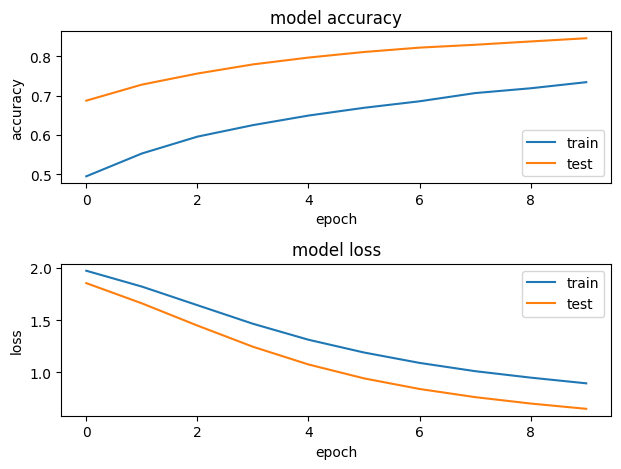

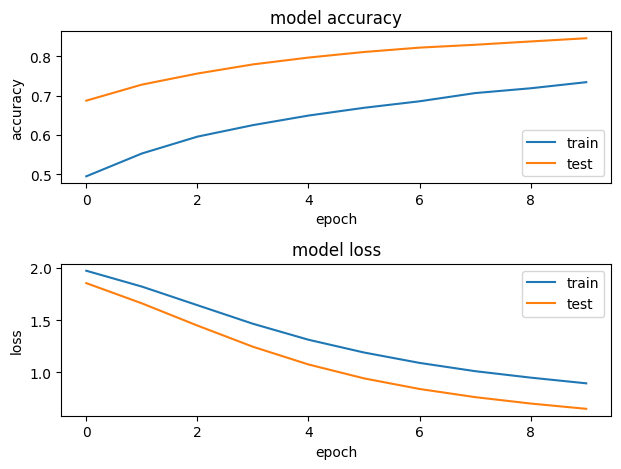

In [24]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [25]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
  json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
